In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
data_mine = pd.read_csv("citibike.csv")
data_mine['one'] = 1
data_mine['starttime'] = pd.to_datetime(data_mine.starttime)
data_starttime = data_mine.set_index("starttime")
data_resampled = data_starttime.resample("3h").sum().fillna(0)
citibike= data_resampled.one

In [3]:
print("CBD:\n{}".format(citibike.head()))
# citibike.head()

print(pd.__version__)

CBD:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64
0.25.1


Text(0, 0.5, 'RENTALS')

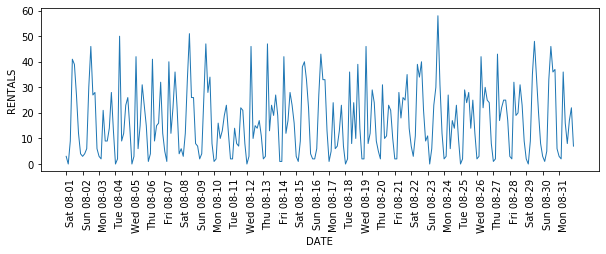

In [11]:
plt.figure(figsize=(10,3))
xticks=pd.date_range(start=citibike.index.min(),end=citibike.index.max(),freq='D')
plt.xticks(xticks,xticks.strftime("%a %m-%d"),rotation=90,ha="left")
plt.plot(citibike,linewidth=1)
plt.xlabel("DATE")
plt.ylabel("RENTALS")

In [15]:
y=citibike.values
# x=citibike.index.strftime("%s").astype("int").reshape(-1,1)
x = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [16]:
n_train=184

In [25]:
#function to evaluate and plot regressor on a given feature set
def eval_on_features(features,target,regressor):
    x_train,x_test=features[:n_train],features[n_train:]
    y_train,y_test=target[:n_train],target[n_train:]
    regressor.fit(x_train,y_train)
    print("Test-set-score:{:.2f}".format(regressor.score(x_test,y_test)))
    y_pred=regressor.predict(x_test)
    y_pred_train=regressor.predict(x_train)
    plt.figure(figsize=(10,3))
    plt.xticks(range(0,len(x),8),xticks.strftime("%a %m-%d"),rotation=90,ha="left")
    
    plt.plot(range(n_train),y_train,label="train")
    plt.plot(range(n_train,len(y_test)+n_train),y_test,'-',label="test")
    plt.plot(range(n_train),y_pred_train,'--',label="prediction train")

    plt.plot(range(n_train,len(y_test)+n_train),y_pred,'--',label="prediction test")
    plt.legend(loc=(1.01,0))
    plt.xlabel("DATE")
    plt.ylabel("RENTALS")

# Starting with random forest model

Test-set-score:-0.04


<Figure size 432x288 with 0 Axes>

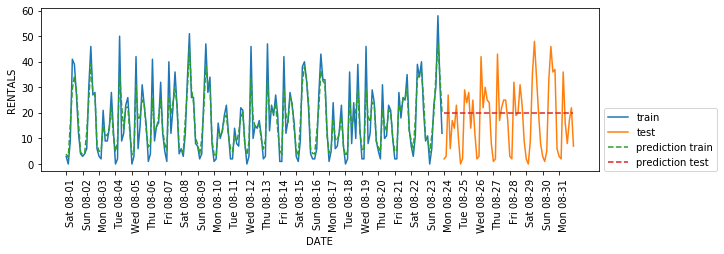

In [27]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0)
plt.figure()
eval_on_features(x,y,regressor)

Test-set-score:0.60


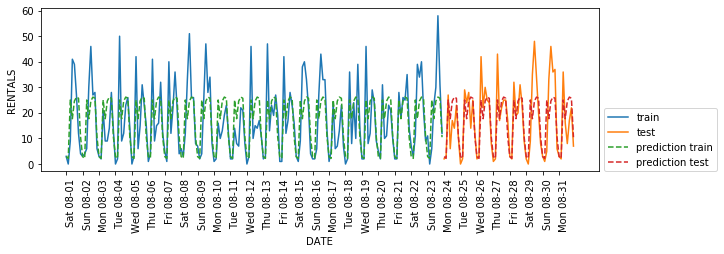

In [29]:
x_hour=citibike.index.hour.values.reshape(-1,1)
eval_on_features(x_hour,y,regressor)

Test-set-score:0.84


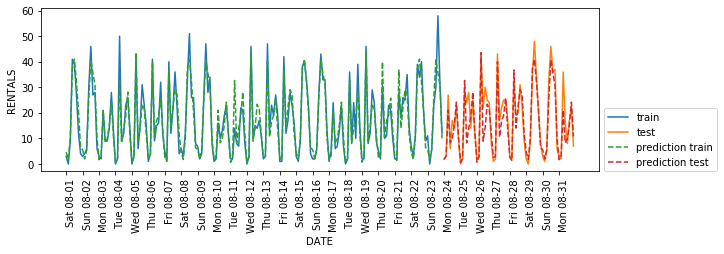

In [30]:
x_hour_week=np.hstack([citibike.index.dayofweek.values.reshape(-1,1),citibike.index.hour.values.reshape(-1,1)])
eval_on_features(x_hour_week,y,regressor)

# Using a linear regression model

Test-set-score:0.13


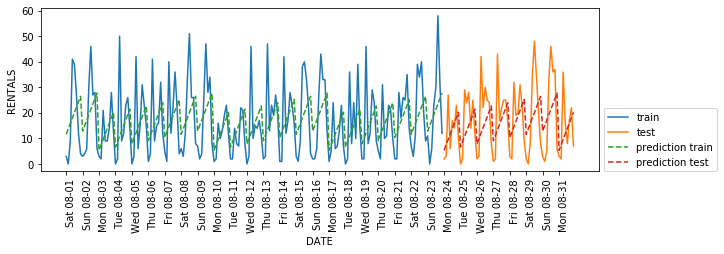

In [31]:
from sklearn.linear_model import LinearRegression
eval_on_features(x_hour_week,y,LinearRegression())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Test-set-score:0.62


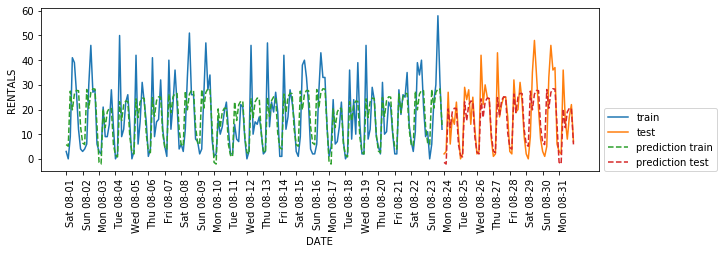

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
enc=OneHotEncoder()
x_hour_week_onehot=enc.fit_transform(x_hour_week).toarray()
eval_on_features(x_hour_week_onehot,y,Ridge())

Test-set-score:0.85


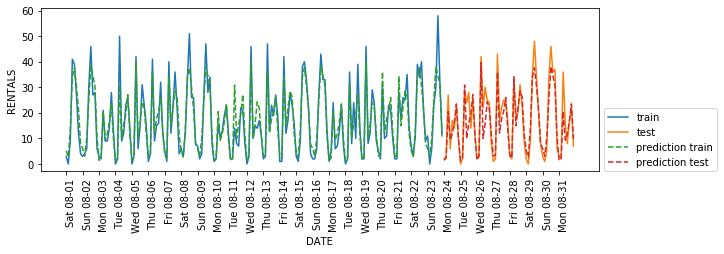

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
x_hour_week_onehot_poly=poly_transformer.fit_transform(x_hour_week_onehot)
lr=Ridge()
eval_on_features(x_hour_week_onehot_poly,y,lr)